# PNG Systemic Fund Application Question

## Introduction

Thank you for taking the time to consider my application to the PNG Systemic Fund. I can honestly say that I actually enjoyed this unique, refreshing, and *fun* application process. 

I chose to approach the following data analysis through the lens of a supply chain manager. First, I broke down the statistical playing field from a variety of lens (gender, product types, age groups, etc.) to identify potential outliers or clustering. This statistical analysis naturally guided my later analysis into how various products, sales, and prices were distributed between gender and ages. Furthermore, I also looked at the spending habits over time, including between genders and age groups. 

Unfortunately, I did not discover PNG until just two days ago; and it was only today that I found out that the application was due in just a few hours. Therefore, constrained time played a role in the detail of my analysis. Given more time, I would have liked to develop and fine-tune a model for predicting demand/sales surges such that the store manager could have a more accurate prediction of when to adjust retail supply.

## Environment + Data Import

In [102]:
# libraries needed
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
retail_data = pd.read_csv('retail_sales_dataset.csv')
print(retail_data.head())
print(f"Data shape: {retail_data.shape}")

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Data shape: (1000, 9)


## Filtering/Gauging Data Ranges

In [4]:
nUniqueTransactionIDs = len(pd.unique(retail_data['Transaction ID']))
print(f"Number of unique transaction IDs: {nUniqueTransactionIDs}")

Number of unique transaction IDs: 1000


In [5]:
nUniqueCustomerIDs = len(pd.unique(retail_data['Customer ID']))
print(f"Number of unique customer IDs: {nUniqueCustomerIDs}")

Number of unique customer IDs: 1000


Given that there are just as many unique transaction and customer IDs as the number of data points, we can conclude that there is no extractable information/relationships from these columns. So, we can simplify our data by removing these:

In [6]:
retail_data.drop(['Transaction ID', 'Customer ID'], axis=1)

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...
995,2023-05-16,Male,62,Clothing,1,50,50
996,2023-11-17,Male,52,Beauty,3,30,90
997,2023-10-29,Female,23,Beauty,4,25,100
998,2023-12-05,Female,36,Electronics,3,50,150


#### Verifying how many product categories there are

In [43]:
uniqueProductCategories = pd.unique(retail_data['Product Category'])
print(uniqueProductCategories)

['Beauty' 'Clothing' 'Electronics']


## Exploratory Data Analysis

#### Stats total

In [103]:
# use weekly averages to make statistical inferences
retail_data_date = retail_data.groupby([pd.Grouper(key='Date', freq='W')]).agg({"Quantity":"sum","Age":"mean","Total Amount":"sum","Price per Unit":"mean"})
retail_data_date = retail_data_date.sort_index()

print(retail_data_date.describe())

        Quantity        Age  Total Amount  Price per Unit
count  54.000000  54.000000     54.000000       54.000000
mean   46.555556  41.509638   8444.444444      183.410668
std    14.415226   3.432281   3579.696633       52.706839
min     4.000000  30.437500   1530.000000       80.833333
25%    39.000000  39.357955   6115.000000      148.961397
50%    46.000000  41.943452   8237.500000      178.625000
75%    54.250000  43.566176   9860.000000      215.267857
max    73.000000  48.500000  17515.000000      366.666667


It's very interesting to note that average weekly age of the customers is clustered around the same 20-year interval (from 30 to 48). This indicates that it probably won't be as useful to compare many relationships to weekly average age ranges since there isn't too much variation (i.e. not many children or elderly). However, since we used averaged weekly averages, by the Central Limit Theorem, this could be due to the fact that we averaged weekly sample averages. Consequently, it will be more meaningful to extract information about individual ages.

Furthermore, observe that for Total Amount, there is a maximum value which is nearly double that of the average. This implies the possibility for more variation in weekly Total Amounts, and thus potential to identify which weeks customers are spending the most money. A similar phenomenon can be observed with regards to Quantity.

#### Stats by gender

In [48]:
retail_data_male = retail_data[retail_data['Gender'] == 'Male']
retail_data_date_male = retail_data_male.groupby([pd.Grouper(key='Date', freq='W')]).agg({"Quantity":"sum","Age":"mean","Total Amount":"sum","Price per Unit":"mean"})
retail_data_date_male = retail_data_date_male.sort_index()

print(f"Male:\n {retail_data_date_male.describe()}\n")

retail_data_female = retail_data[retail_data['Gender'] == 'Female']
retail_data_date_female = retail_data_female.groupby([pd.Grouper(key='Date', freq='W')]).agg({"Quantity":"sum","Age":"mean","Total Amount":"sum","Price per Unit":"mean"})
retail_data_date_female = retail_data_date_female.sort_index()

print(f"Female:\n {retail_data_date_female.describe()}\n")

Male:
         Quantity        Age  Total Amount  Price per Unit
count  54.000000  54.000000     54.000000       54.000000
mean   22.518519  41.652367   4132.592593      179.247557
std     9.608842   4.622782   2828.153398       90.919108
min     4.000000  27.833333    270.000000       32.500000
25%    15.000000  39.444444   2255.000000      115.000000
50%    22.000000  41.600000   3537.500000      170.189394
75%    28.750000  44.813636   5440.000000      232.638889
max    43.000000  50.800000  13425.000000      400.000000

Female:
         Quantity        Age  Total Amount  Price per Unit
count  53.000000  53.000000     53.000000       53.000000
mean   24.490566  41.303073   4393.207547      177.448461
std     9.020538   4.446606   2458.501360       72.650165
min     4.000000  28.400000    390.000000       30.833333
25%    18.000000  39.133333   2650.000000      116.764706
50%    24.000000  41.454545   4080.000000      183.000000
75%    30.000000  44.166667   5975.000000      218.8461

Observe that there is no observable difference in Quantity by Gender. That said, males appear to have a slightly greater variation in the Total Amount spent when compared to females. This is complemented by the fact that males also have greater variation in the Price per Unit of their consumer products, with a roughly equal mean, when compared to females. Overall, we would expect the spending habits of males to look much more sporatic over time.

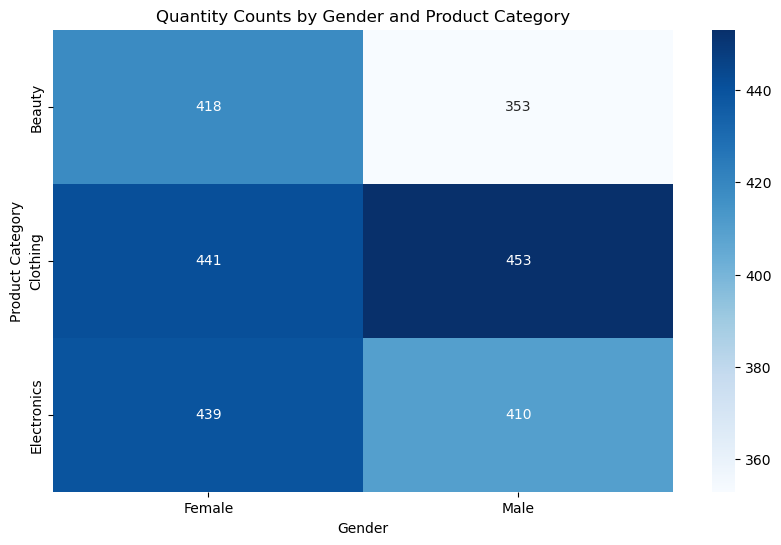

In [80]:
# Create a pivot table to get quantity counts
pivot_table = retail_data.pivot_table(index='Product Category', columns='Gender', values='Quantity', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=True)

# Customize the plot (optional)
plt.title('Quantity Counts by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Product Category')

plt.show()

For the most part, there seems to be no correlation between product category and gender, with the exception of beauty products which have a *slight* female lead.

#### Stats by product category

In [76]:
for category in uniqueProductCategories:
    retail_data_cat = retail_data[retail_data['Product Category'] == category]
    retail_data_cat = retail_data_cat[['Quantity', 'Total Amount', 'Price per Unit']]
    print(f"{category}:\n {retail_data_cat.describe()}\n")

Beauty:
          Quantity  Total Amount  Price per Unit
count  307.000000    307.000000      307.000000
mean     2.511401    467.475570      184.055375
std      1.100668    563.612788      194.929399
min      1.000000     25.000000       25.000000
25%      2.000000     75.000000       30.000000
50%      3.000000    120.000000       50.000000
75%      3.000000    900.000000      300.000000
max      4.000000   2000.000000      500.000000

Clothing:
          Quantity  Total Amount  Price per Unit
count  351.000000    351.000000      351.000000
mean     2.547009    443.247863      174.287749
std      1.142647    550.695917      186.017065
min      1.000000     25.000000       25.000000
25%      1.500000     60.000000       30.000000
50%      3.000000    120.000000       50.000000
75%      4.000000    600.000000      300.000000
max      4.000000   2000.000000      500.000000

Electronics:
          Quantity  Total Amount  Price per Unit
count  342.000000     342.00000      342.000000
mean

Surprisingly, there doesn't appear to be any difference in the Quantity, Total Amount, or Price per Unit between the three product categories. This is a bit counterintuitive considering one would assume electronics to generally be priced more than clothing, for example. However, this does not account for how each product category is distributed over time.

#### Distribution of total quantity by age group

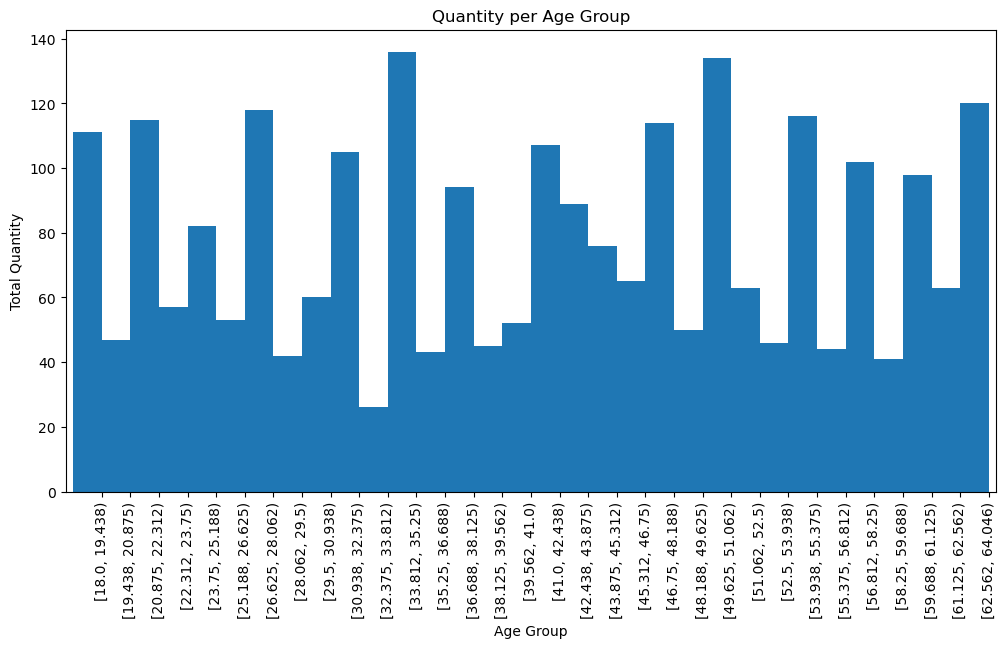

In [104]:
# the number of bins should be sqrt(number of data points), by convention
total_num_vals = retail_data.shape[0]
NUM_BINS = math.ceil(np.sqrt(total_num_vals))

# Create a new column 'AgeGroup' based on the age bins
retail_data['AgeGroup'] = pd.cut(retail_data['Age'], bins=NUM_BINS, right=False)

quantity_data = retail_data.groupby(['AgeGroup'])['Quantity'].sum()

# Plotting
ax = quantity_data.plot(kind='bar', colormap='tab10', position=1, width=1, figsize=(12, 6))

# Customize the plot (optional)
plt.title('Quantity per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity')

plt.show()

There does not seem to be any observable correlation between age and quantity over the past year of data. However, a trend may still exist between age and quantity per category...

#### Distribution of quantity by age range and product category

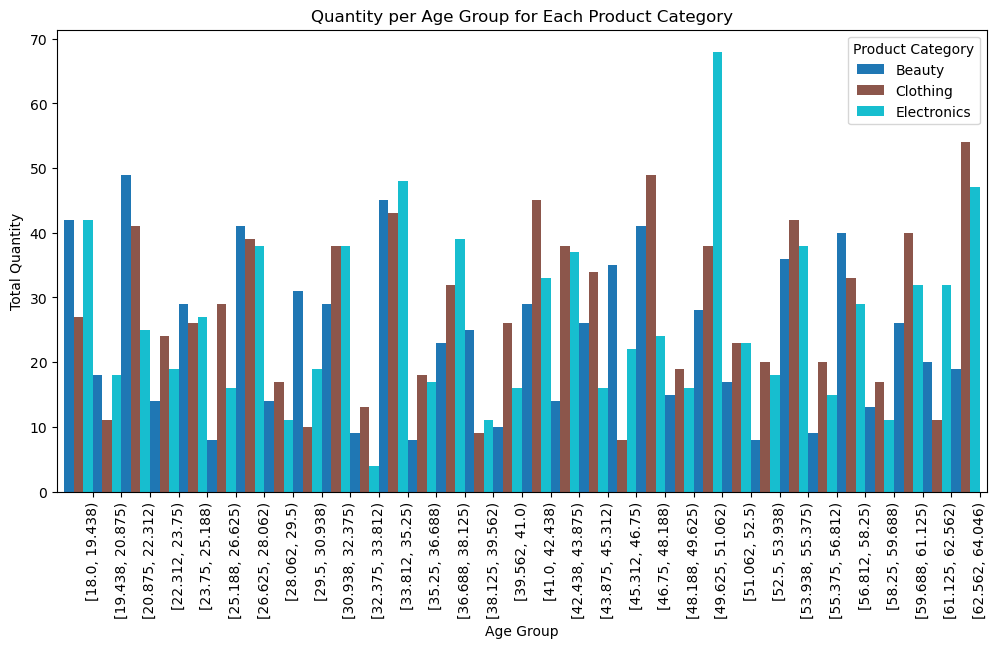

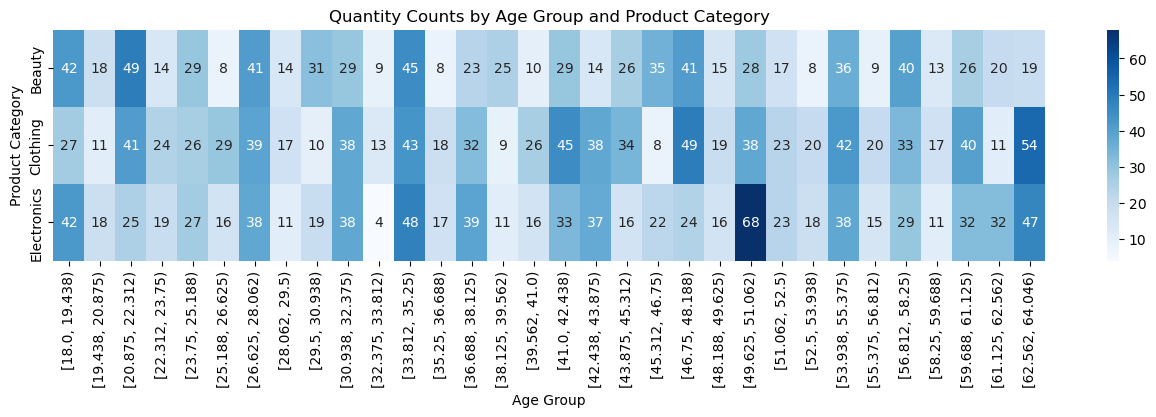

In [84]:
quantity_category_data = retail_data.groupby(['AgeGroup', 'Product Category'])['Quantity'].sum().unstack()

# Plotting
ax = quantity_category_data.plot(kind='bar', colormap='tab10', position=1, width=1, figsize=(12, 6))

# Customize the plot (optional)
plt.title('Quantity per Age Group for Each Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity')
plt.legend(title='Product Category')

plt.show()

# Create a pivot table to get quantity counts
pivot_table = retail_data.pivot_table(index='Product Category', columns='AgeGroup', values='Quantity', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(16, 3))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=True)

# Customize the plot (optional)
plt.title('Quantity Counts by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Product Category')

plt.show()

Both visualizations are displaying the same content, but it's worth analyzing both, depending on the preference of the reader. In any case, its once again clear that there are many observable trends between age groups, though there are a few noteworthy items. First, we can see that some age groups (such as [26.625, 28.06] and [33.812, 35.25]) exhibited overall stronger tendencies to consume considerable amounts of product across all product categories. In addition, the age group [49.625, 51.062] exhibited an unusually high preference for electronic products compared to other age groups and product categories. We can use this information, combined with information about this age group's spending habits over time (see later), to make a prediction for when is the best time to surge electronics supply.

#### Distribution of Quantities sold over time

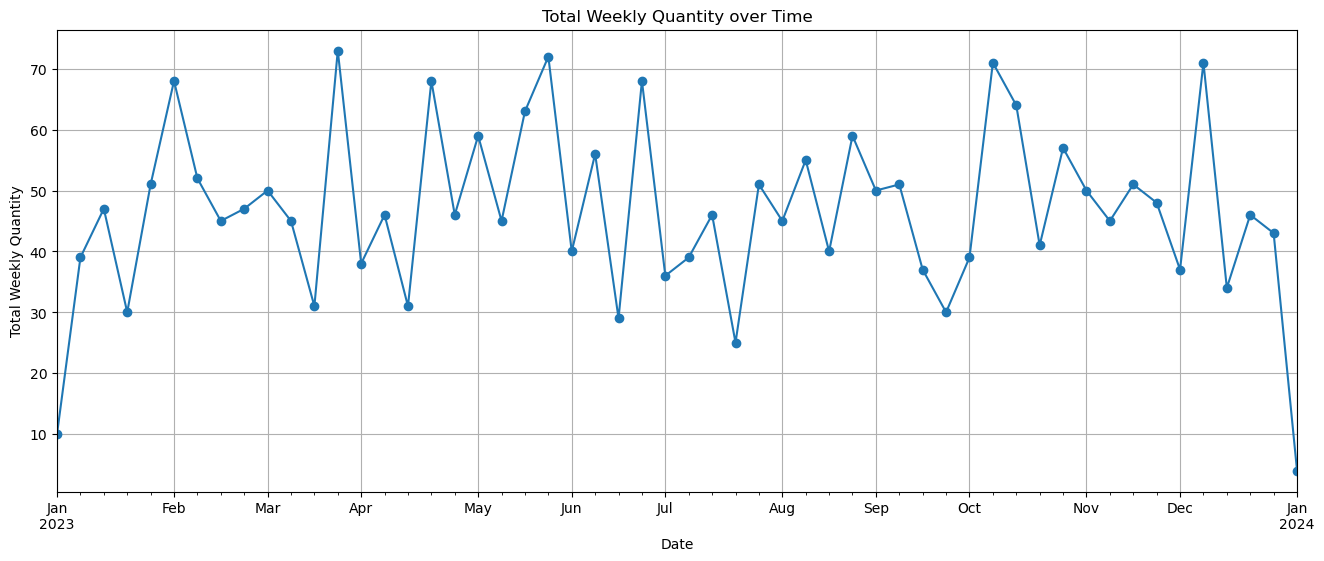

In [96]:
# Assuming retail_data is your DataFrame
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Resample weekly sales for each category
weekly_quant = retail_data.groupby([pd.Grouper(key='Date', freq='W')])['Quantity'].sum()

# Plotting
ax = weekly_quant.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Total Weekly Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Quantity')

plt.grid(True)
plt.show()

There doesn't appear to be a clearly defined periodic or observable trend in the total amount of product sold over time. However, it could still be likely that indivdual product categories do have trends. Overall, I wouldn't consider this plot to be especially useful; but it's interesting to see that some local peaks correspond with national holidays (i.e. Valentines' Day, Easter, Memorial Day, and Christmas). These are, in general, the biggest holidays for electronics, clothing, and/or beauty products due to sales or gift-giving. It makes sense that a holiday such as Thanksgiving does not have a local peak since it's generally associated with strictly food products.

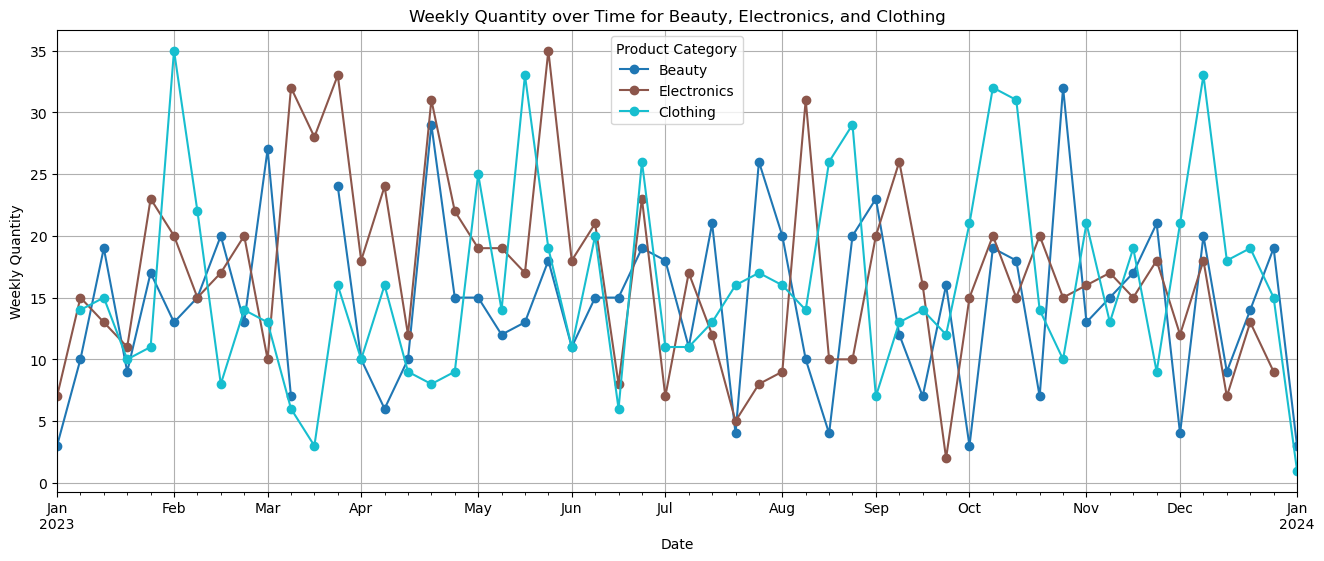

In [97]:
# Resample weekly sales for each category
weekly_quant = retail_data.groupby([pd.Grouper(key='Date', freq='W'), 'Product Category'])['Quantity'].sum().unstack()

# Plotting
ax = weekly_quant.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Weekly Quantity over Time for Beauty, Electronics, and Clothing')
plt.xlabel('Date')
plt.ylabel('Weekly Quantity')

ax.legend(['Beauty', 'Electronics', 'Clothing'], title='Product Category')

plt.grid(True)
plt.show()

Here we can see somewhat more observable patterns in the amount of product sold over time for each product category. In this case, there appears to be a periodic trend in the amount of clothing bought over time with peaks generally corresponding to changes in seasons (i.e. early spring, early summer, early fall, and the new year). This could be hinting at general fashion trends.

However, there is not such an easily inferable reason for the trend in electronics, at least none that come to my mind. That said, the spikes between August and October could possibly be explained by the fact that that is usually the time in which Apple releases its new line of iPhones, thus causing both disocunted sales on older phones and increased hype for buying new ones.

There does not appear to be a pattern for beauty products.

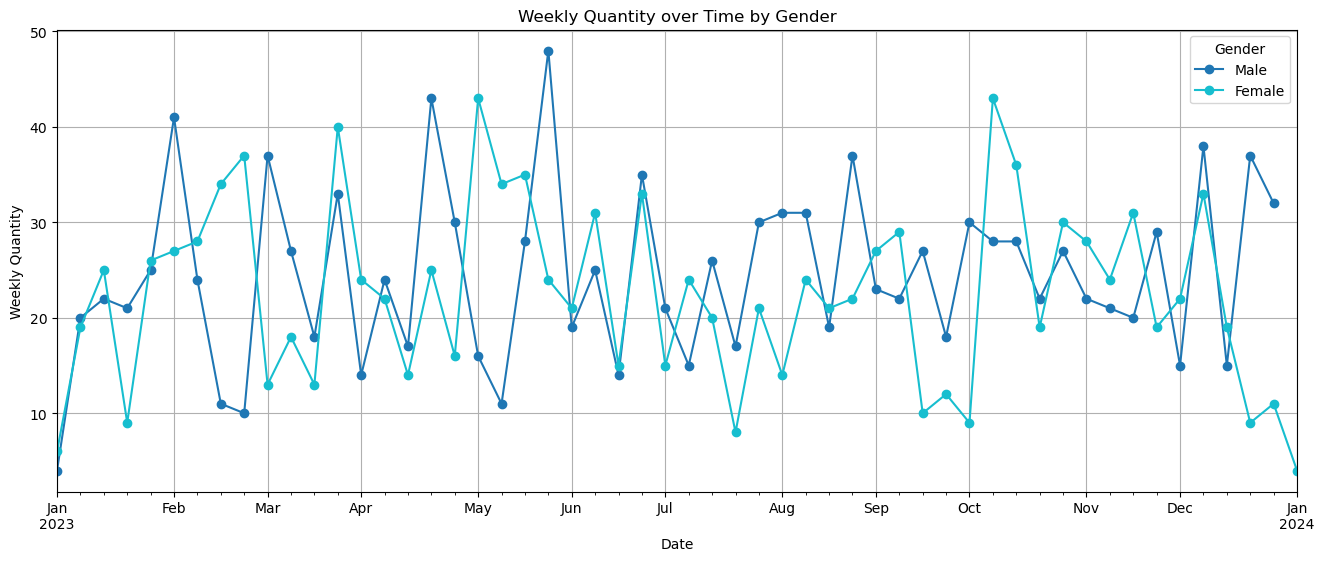

In [98]:
# Resample weekly sales for each category
weekly_quant = retail_data.groupby([pd.Grouper(key='Date', freq='W'), 'Gender'])['Quantity'].sum().unstack()

# Plotting
ax = weekly_quant.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Weekly Quantity over Time by Gender')
plt.xlabel('Date')
plt.ylabel('Weekly Quantity')

ax.legend(['Male', 'Female'], title='Gender')

plt.grid(True)
plt.show()

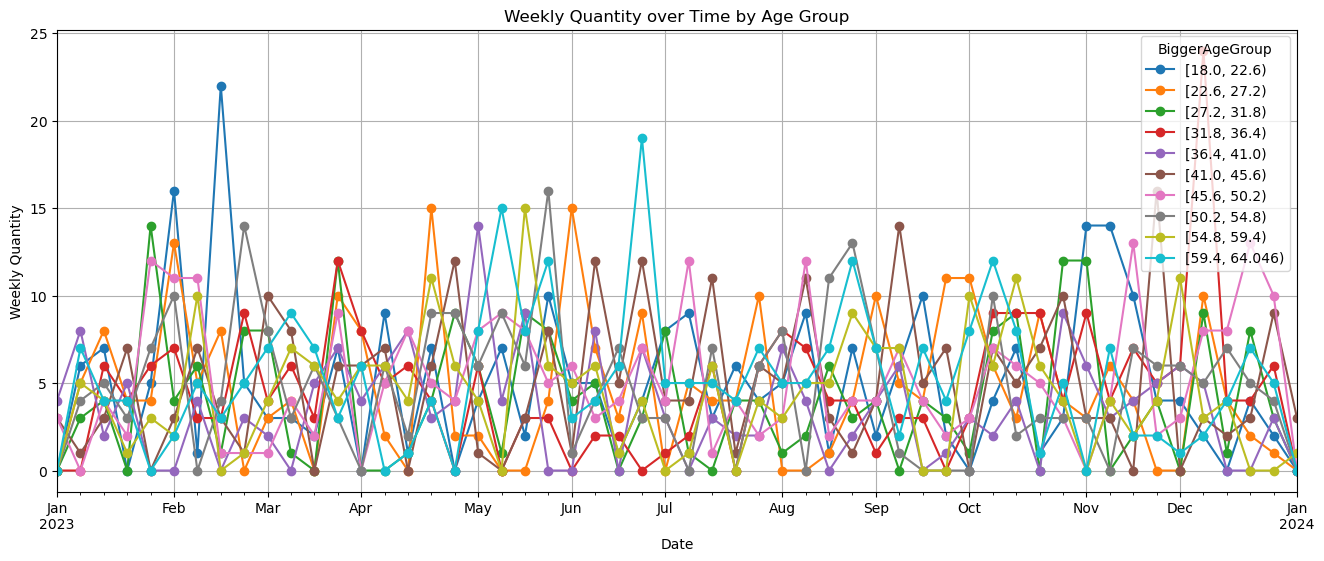

In [101]:
# Create a new column 'AgeGroup' based on the age bins
retail_data['BiggerAgeGroup'] = pd.cut(retail_data['Age'], bins=10, right=False)

# Resample weekly sales for each category
weekly_quant = retail_data.groupby([pd.Grouper(key='Date', freq='W'), 'BiggerAgeGroup'])['Quantity'].sum().unstack()

# Plotting
ax = weekly_quant.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Weekly Quantity over Time by Age Group')
plt.xlabel('Date')
plt.ylabel('Weekly Quantity')

plt.grid(True)
plt.show()

This visualization is pretty cluttered but it nonetheless conveys some interesting information regarding prime spending times by age group. For example, mid-February appears to be the ideal time to tailor retail to the spending preferences of the [18.0, 22.6] age range; and mid-June appears to be a good time to tailor retail to the spending preferences of [59.4, 64.046] age group.

#### Distribution of Sales (Total Amount) over time

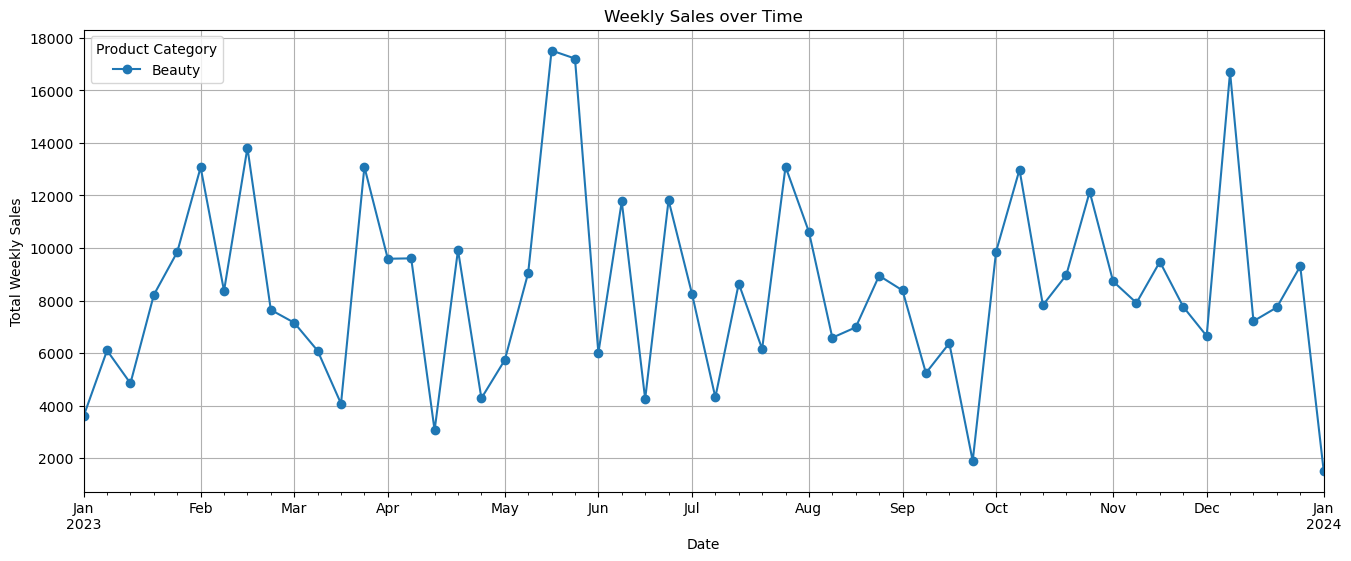

In [105]:
# Assuming retail_data is your DataFrame
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Filter data for Beauty, Electronics, and Clothing product categories
selected_categories = ['Beauty', 'Electronics', 'Clothing']
filtered_data = retail_data[retail_data['Product Category'].isin(selected_categories)]

# Resample weekly sales for each category
weekly_sales = filtered_data.groupby([pd.Grouper(key='Date', freq='W')])['Total Amount'].sum()

# Plotting
ax = weekly_sales.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')

# Set legend labels
legend_labels = selected_categories
ax.legend(legend_labels, title='Product Category')

plt.grid(True)
plt.show()

Again, not much of an observable trend here. But, it's nonetheless worthwhile acknowledging the sudden spike in sales in mid-May (possibly Memorial Day sales?), and a spike in sales preceding Christmas (Black Friday?).

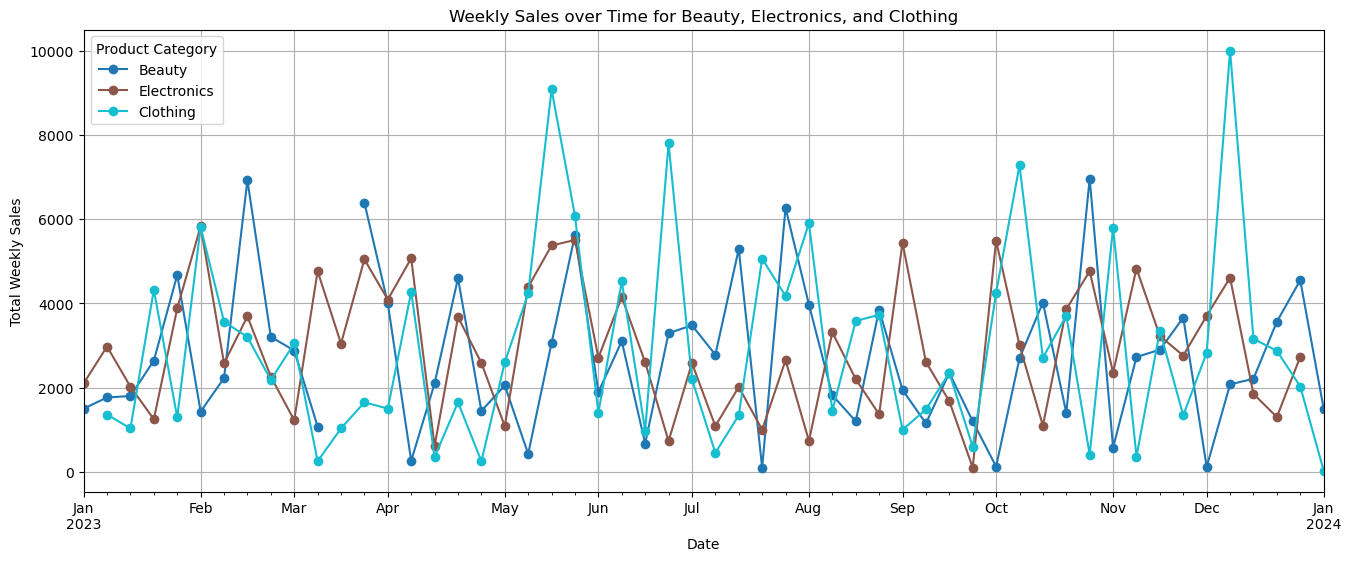

In [91]:
# Resample weekly sales for each category
weekly_sales = filtered_data.groupby([pd.Grouper(key='Date', freq='W'), 'Product Category'])['Total Amount'].sum().unstack()

# Plotting
ax = weekly_sales.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Weekly Sales over Time for Beauty, Electronics, and Clothing')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')

# Set legend labels
legend_labels = selected_categories
ax.legend(legend_labels, title='Product Category')

plt.grid(True)
plt.show()

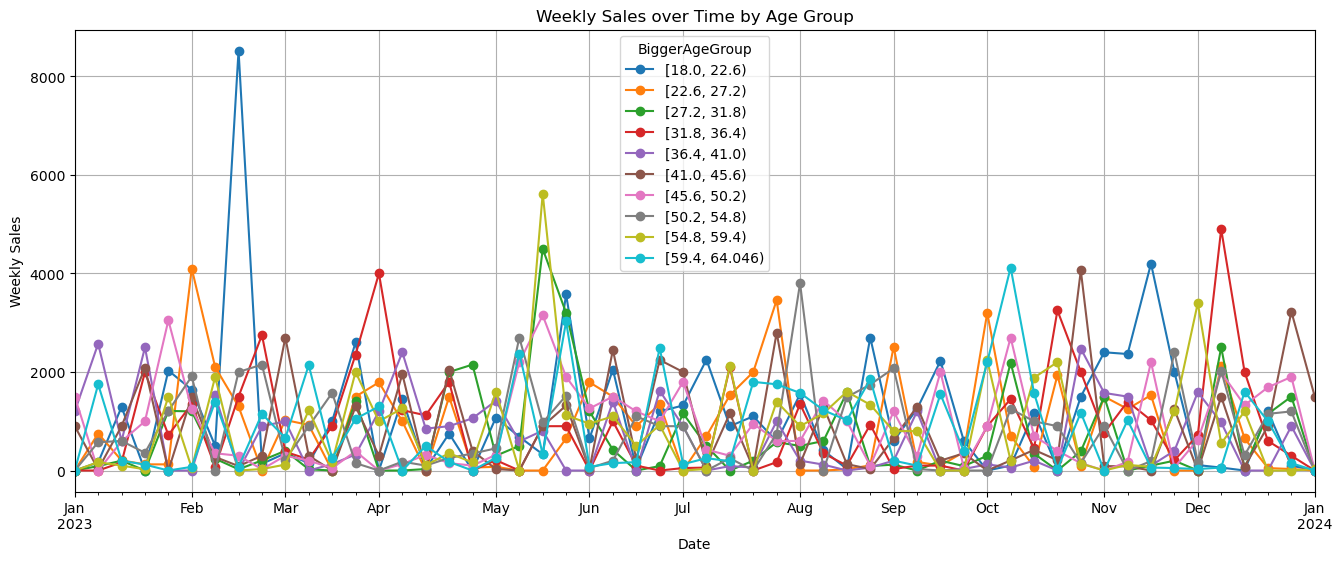

In [100]:
# Resample weekly sales for each category
weekly_quant = retail_data.groupby([pd.Grouper(key='Date', freq='W'), 'BiggerAgeGroup'])['Total Amount'].sum().unstack()

# Plotting
ax = weekly_quant.plot(kind='line', marker='o', linestyle='-', colormap='tab10', figsize=(16, 6))

# Customize the plot (optional)
plt.title('Weekly Sales over Time by Age Group')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

plt.grid(True)
plt.show()

Here we see a spike in sales (mid-February) corresponding to the previously observed spike in quantity. Yet, there is not a spike in sales corresponding to the spike in quantity in mid-June. This implies that, at least in this time period, the [59.4, 64.046] age range (accounting for the Quantity spike), bought products with lower price per unit.

## Conclusion

Overall, this analysis was pretty difficult in the sense that minimal correlations between variables were found. There were a few noteworthy outliers that could somewhat be predicted from time-scale events (holidays) or overall trends in product category turnover (fashion trends and new technology releases). 

Given more time, I would have liked to get more fine-grained in my analyses, such as by comparing further filters to each other (i.e. Male+Electronics compared to Female+Electronics, etc.) 

If a trend *could* be identified, it would be worthwhile to develop a either a time-series regression model for predicting some subset of sales, or a classification model for predicting what a customer might want to buy, given the time, age, and gender. My approach to this would probably include some variation of the XGBoost model, which has generally worked well for me in Kaggle competitions. 